### Vehicle Detection using Convoluted Neural Networks (Keras)

The convolutional neural network (CNN) is a class of deep learning neural networks. CNNs represent a huge breakthrough in image recognition. They’re most commonly used to analyze visual imagery and are frequently working behind the scenes in image classification. They can be found at the core of everything from Facebook’s photo tagging to self-driving cars. 

A CNN has <br>
•	Convolutional layers <br>
•	ReLU layers <br>
•	Pooling layers <br>
•	a Fully connected layer <br>

### Import the required libraries

Here we will be making use of the Keras library for creating our model and training it. We also use Matplotlib and Seaborn for visualizing our dataset to gain a better understanding of the images we are going to be handling. Another important library to handle image data is Opencv.

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Activation, Dropout, MaxPooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

import cv2
import os
from os.path import join
import pandas as pd
import numpy as np

In [36]:
# define the path to our data
path = "/"
dir_list = os.listdir(path)

In [37]:
print(dir_list)

['CRP BSA BCA assay', 'Documents 1', 'Documents 2', 'Boyang C60', 'SEM', 'zurich', 'System Volume Information', '.Spotlight-V100', 'UCL antibody module', 'youtube', '.fseventsd', 'Expenses', 'vdata', 'non_Faradaic_Impedance_Model_1_0_0.pdf', 'Presentation Progression 1 new.pptx', 'Copy of Claims_form_BLANK.xlsx', 'Bo zurich', '._Presentation CDT Public Engagement.pptx', 'Conference Poster Boyang Chen.pptx', '~$Presentation Progression 1 new.pptx', 'working', 'OverseasTravelRiskAssessmentForm2018- Boyang +JK.docx', '~$Presentation Year 1 New.pptx', 'Presentation Year 1 New.pptx', 'Korea conference', 'venv', 'Presentation Year 1 New 2.pptx', 'Copy of Claims_form_BLANK 1.xlsx', 'Deed of Assignment of Intellectual Property Rights +JK.docx', 'Bath conference', 'Caspase activity assay', 'CHO- K1 images', 'Book links', 'UCL meeting 2019', 'HTH presentation', 'SCONUL Application', 'Job files', 'UCL assignment', 'wallpaper lengths.docx', 'Potential modules for teaching.docx', 'COVID 19 extensio

In [4]:
# specify the main directory
maindir = "/vdata"

In [39]:
vehicle_dir = "/vdata/vehicles"
nonvehicle_dir = "/vdata/non-vehicles"
vehicle = os.listdir(maindir+"/vehicles")
non_vehicle = os.listdir(maindir+"/non-vehicles")

### Data visualization 

Let visualize our data to explore what we are working with.

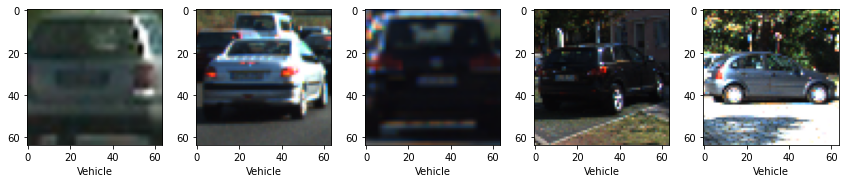

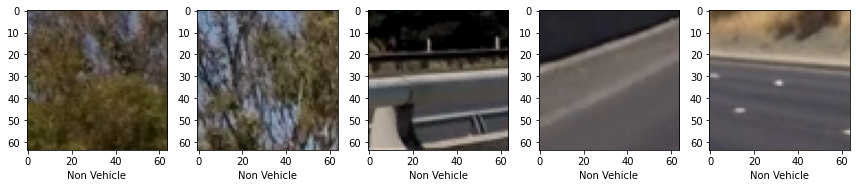

In [12]:
plt.figure(figsize=(12,9))
vehicle_img = np.random.choice(vehicle,5)
nonvehicle_img = np.random.choice(non_vehicle,5)
for i in range(5):
    plt.subplot(1,5,i+1)
    img = cv2.imread(vehicle_dir+'/'+vehicle_img[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel("Vehicle")
    #plt.axis("off")
    plt.tight_layout()
    plt.imshow(img)
plt.show()
plt.figure(figsize=(12,9)) 
for i in range(5):
    plt.subplot(1,5,i+1)
    img = cv2.imread(nonvehicle_dir+'/'+nonvehicle_img[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel("Non Vehicle")
    #plt.axis("off")
    plt.imshow(img)
plt.tight_layout()
plt.show()

### Loading the data 
Once we have defined our path. We will use for loops to create two lists train and label. For each image in the folder 'vehicle' we will assign it a label "vehicle" and vice versa. We use the Opencv imread function to read the images in the RGB format and resize the images to our desired width and height in this case both being 64.

In [17]:
pip install tqdm

     ---------------------------------------- 76.2/76.2 KB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [38]:
import tqdm
from tensorflow.keras.preprocessing import image

In [40]:
train = []
label = []
for i in tqdm.tqdm(vehicle):
    img = cv2.imread(vehicle_dir+'/'+ i)
    img = cv2.resize(img,(64,64))
    train.append(img)
    label.append("Vehicle")
    
for i in tqdm.tqdm(non_vehicle):
    img = cv2.imread(nonvehicle_dir+'/'+ i)
    img = cv2.resize(img,(64,64))
    train.append(img)
    label.append("Non Vehicle")

100%|██████████| 8968/8968 [00:02<00:00, 3675.08it/s]


In [41]:
# convert images into an array
train = np.array(train)
label = np.array(label)
train.shape,label.shape

((17760, 64, 64, 3), (17760,))

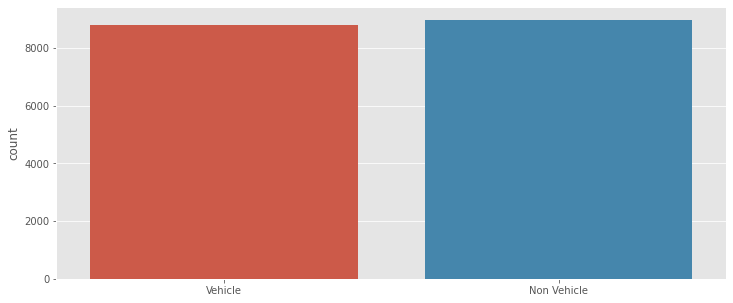

In [42]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(12,5))
sns.countplot(x = label)
plt.show()

We can see that our data set is balanced. That's good for building a classification model. <br>

### Label encoder
Convert labels 'vehicle' and 'non-vehicle' to binary classes (1/0)

In [43]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
le = LabelEncoder()
label= le.fit_transform(label)

In [23]:
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [44]:
label = to_categorical(label)
print(label.shape)
train,label = shuffle(train, label)

(17760, 2)


### Train test split

In [45]:
x_train,x_test,y_train,y_test = train_test_split(train,label,test_size=0.2,random_state = 42)

In [46]:
x_train.shape

(14208, 64, 64, 3)

In [47]:
y_train.shape

(14208, 2)

## Keras Layers for CNNs

### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained:
- `filters`: the number of filter used per location.  In other words, the depth of the output.
- `kernel_size`: an (x,y) tuple giving the height and width of the kernel to be used
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `input_shape`: required only for the first layer

Note, the size of the output will be determined by the kernel_size, strides

### MaxPooling2D
used to shrink the dimension of the image <br>
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.

### Dense 
Each neuron in the dense layer receives input from all neurons of its previous layer. 

### Activation 
An activation function in a neural network defines how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network.
The rectified linear activation function, or ReLU activation function, is perhaps the most common function used for hidden layers. It is less susceptible to vanishing gradients


In [48]:
model = Sequential()

model.add(Conv2D(32, 3,padding="same", activation="relu", input_shape=(64,64,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)        

In [52]:
# we will use adam as the optimizer and binary_crossentropy to calculate loss
opt = Adam(lr=0.001)
model.compile(optimizer = opt , loss = "binary_crossentropy", metrics = ['accuracy'])

c:\Users\Boyang\venv1\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [53]:
history = model.fit(x_train,y_train,epochs = 10 ,batch_size=10, validation_data = (x_test,y_test))

Epoch 1/10
1421/1421 [==============================] - 36s 25ms/step - loss: 0.2976 - accuracy: 0.9267 - val_loss: 0.0817 - val_accuracy: 0.9814
Epoch 2/10
1421/1421 [==============================] - 35s 24ms/step - loss: 0.0939 - accuracy: 0.9699 - val_loss: 0.0522 - val_accuracy: 0.9859
Epoch 3/10
1421/1421 [==============================] - 35s 25ms/step - loss: 0.0690 - accuracy: 0.9781 - val_loss: 0.0391 - val_accuracy: 0.9879
Epoch 4/10
1421/1421 [==============================] - 35s 25ms/step - loss: 0.0651 - accuracy: 0.9775 - val_loss: 0.0948 - val_accuracy: 0.9679
Epoch 5/10
1421/1421 [==============================] - 36s 26ms/step - loss: 0.0562 - accuracy: 0.9818 - val_loss: 0.0425 - val_accuracy: 0.9893
Epoch 6/10
1421/1421 [==============================] - 35s 25ms/step - loss: 0.0510 - accuracy: 0.9844 - val_loss: 0.0483 - val_accuracy: 0.9859
Epoch 7/10
1421/1421 [==============================] - 35s 25ms/step - loss: 0.0642 - accuracy: 0.9820 - val_loss: 0.0804 -

In [32]:
model.evaluate(x_test,y_test)

111/111 [==============================] - 2s 17ms/step - loss: 0.0351 - accuracy: 0.9879


[0.03514926880598068, 0.9878941178321838]

In [33]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred[:15]

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [34]:
y_test = np.argmax(y_test,axis=1)
y_test[:15]


array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

Classification report

In [35]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1749
           1       1.00      0.83      0.90      1803

    accuracy                           0.91      3552
   macro avg       0.92      0.91      0.91      3552
weighted avg       0.92      0.91      0.91      3552



(<Figure size 576x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

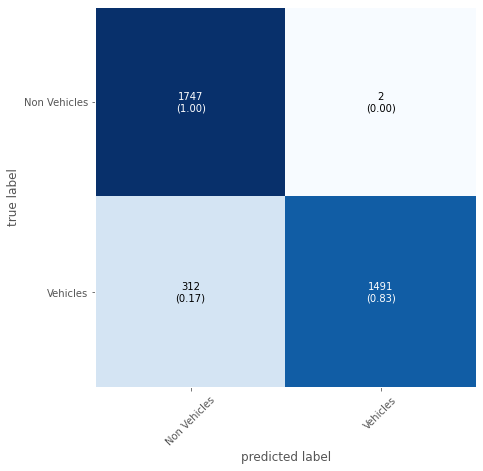

In [38]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names =['Non Vehicles', 'Vehicles'],
                     show_normed = True)

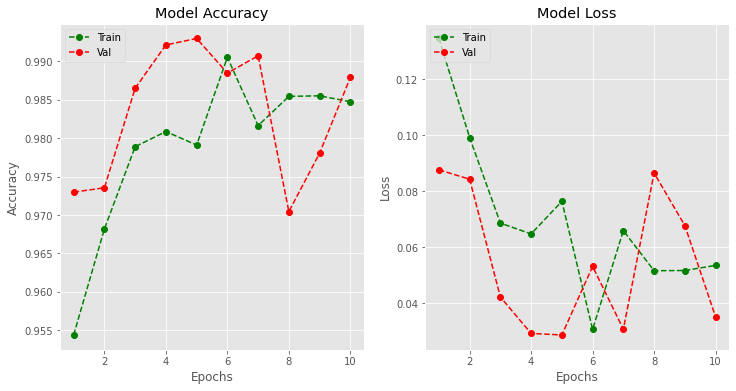

In [39]:
plt.figure(figsize = (12,6))
epochs = range(1,11)
plt.subplot(1,2,1)
plt.plot(epochs,history.history['accuracy'],'go--')
plt.plot(epochs,history.history['val_accuracy'],'ro--')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Val'],loc ='upper left')

plt.subplot(1,2,2)
plt.plot(epochs,history.history['loss'],'go--')
plt.plot(epochs,history.history['val_loss'],'ro--')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Val'],loc ='upper left')
plt.show()

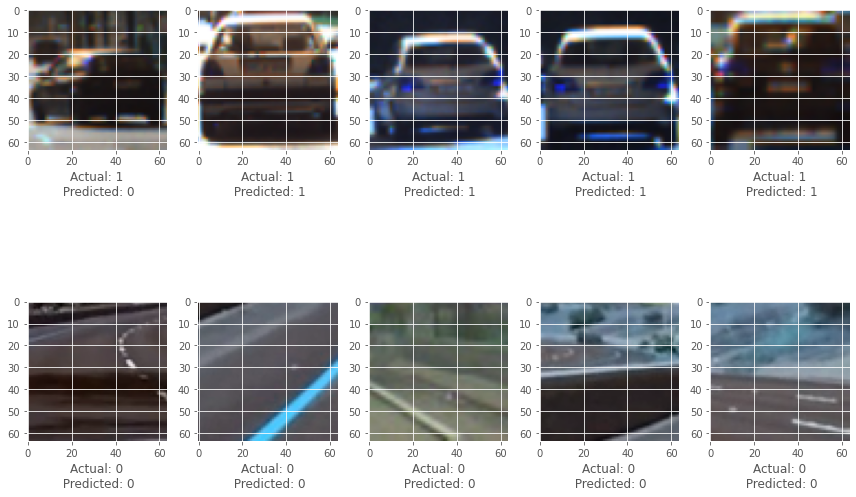

In [40]:
plt.figure(figsize=(12,9))
for i in range(10):
    sample_idx = np.random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[sample_idx])
    plt.xlabel(f"Actual: {y_test[sample_idx]}\n Predicted: {y_pred[sample_idx]}")
    
plt.tight_layout()
plt.show()

Here we find that the model works quite well with accuracy of 99.99% on training dataset and 99.62% on test dataset.Thus this model is apt to identify the vehicles.

### Hyperparameter Tuning


In [55]:
root = "./vdata"
os.listdir(root)

['vehicles', 'non-vehicles']

In [56]:
vehicle_dir = root+"/vehicles"
non_vehicle_dir = root+"/non-vehicles"

In [57]:
vehicle_names = os.listdir(vehicle_dir)
non_vehicle_names = os.listdir(non_vehicle_dir)

In [58]:
working_root = "./working"

In [59]:
pip install plotly

In [60]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from keras.preprocessing.image import load_img,ImageDataGenerator

In [61]:
images = []
fig = make_subplots(2,5,row_titles=["Vehicles","Non_vehicles"])
for i,index in enumerate(tf.random.uniform([5],maxval=len(vehicle_names),dtype=tf.int32).numpy()):
    image = load_img(join(vehicle_dir,vehicle_names[index]))
    fig.add_trace(go.Image(z=image),1,i+1)
for i,index in enumerate(tf.random.uniform([5],maxval=len(non_vehicle_names),dtype=tf.int32).numpy()):
    image = load_img(join(non_vehicle_dir,non_vehicle_names[index]))
    fig.add_trace(go.Image(z=image),2,i+1)

fig.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
fig.show()

In [62]:
image = load_img(join(vehicle_dir,vehicle_names[0]))

In [63]:
image.size

(64, 64)

In [64]:
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    rescale=1./255,
    zoom_range=0.2,
    validation_split=0.2,
)

In [65]:
train_generator = data_gen.flow_from_directory(maindir,target_size=(64,64),class_mode="binary",seed=100,subset="training")

Found 14209 images belonging to 2 classes.


In [66]:
val_generator = data_gen.flow_from_directory(maindir,target_size=(64,64),class_mode="binary",seed=100,subset="validation")

Found 3551 images belonging to 2 classes.


In [67]:
train_generator.image_shape

(64, 64, 3)

In [71]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=train_generator.image_shape))
    
    for i in range(hp.Int('num_layers_conv', 2, 4)):
      model.add(Conv2D(hp.Int('conv2D_1_' + str(i),32,128,32), 2, activation='relu'))
      model.add(Conv2D(hp.Int('conv2D_2_' + str(i),32,128,32), 2, activation='relu'))
      model.add(MaxPooling2D())

    model.add(Flatten())
    for i in range(hp.Int('num_layers_dense', 1, 4)):  
      model.add(Dense(units=hp.Int('units_' + str(i),min_value=1024,max_value=128,step=-256), activation='relu'))
      model.add(Dropout(hp.Choice('dropout_' + str(i), [0.2,0.5]))),
      
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss=keras.losses.BinaryCrossentropy(True),
        metrics=['accuracy']
    )
    return model

In [72]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory=join(working_root,"tuner"),
    project_name='optimizer')

INFO:tensorflow:Reloading Oracle from existing project ./working\tuner\optimizer\oracle.json


In [73]:
tuner.search(train_generator,
             epochs=10,
             validation_data=val_generator, callbacks=[EarlyStopping(patience=2)])

Trial 6 Complete [00h 37m 08s]
val_accuracy: 0.5049281716346741

Best val_accuracy So Far: 0.9987796942392985
Total elapsed time: 03h 30m 52s
INFO:tensorflow:Oracle triggered exit


In [74]:
best_hp = tuner.get_best_hyperparameters()[0]
print(best_hp.values)

{'num_layers_conv': 3, 'conv2D_1_0': 96, 'conv2D_2_0': 128, 'conv2D_1_1': 64, 'conv2D_2_1': 64, 'num_layers_dense': 3, 'units_0': 512, 'dropout_0': 0.5, 'learning_rate': 0.001, 'conv2D_1_2': 32, 'conv2D_2_2': 32, 'units_1': 1024, 'dropout_1': 0.2, 'units_2': 1024, 'dropout_2': 0.2}


In [75]:
model_2 = tuner.get_best_models()[0]
model_2.save(join(working_root,"tuner_model.h5"))
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 63, 63, 96)        1248      
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 128)       49280     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        32832     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                    

In [76]:
model_2.evaluate(val_generator)

111/111 [==============================] - 21s 188ms/step - loss: 0.0041 - accuracy: 0.9997


[0.004094030242413282, 0.9997183680534363]